<a href="https://colab.research.google.com/github/gitmattalves/dados_eleitorais/blob/main/Projeto_Eleicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import numpy as np

In [ ]:
# Abrindo o arquivos de dado

df = pd.read_csv('/content/votacao_secao_2018_RR.csv', sep=';', encoding='ISO-8859-1')
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
0,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,5,436,7,DEPUTADO ESTADUAL,36200,JORGE LUIS VILTRE ESTEVEZ,1
1,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,1,206,6,DEPUTADO FEDERAL,1400,KARDEC JAKSON SANTOS DA SILVA,2
2,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,5,424,7,DEPUTADO ESTADUAL,19900,VANDERLEI LIMA SANTANA,1
3,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3034,CARACARAÍ,2,2,5,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,13
4,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,1,36,5,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,19


In [ ]:
df.shape

(210618, 22)

Verificando as primeiras e últimas colunas

In [ ]:
df.tail()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
210613,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,5,149,6,DEPUTADO FEDERAL,10,Partido Republicano Brasileiro,1
210614,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,5,188,7,DEPUTADO ESTADUAL,96,VOTO NULO,9
210615,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,1,645,6,DEPUTADO FEDERAL,7722,LEVI RODRIGUES SOARES,1
210616,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,5,343,6,DEPUTADO FEDERAL,4343,RAIMUNDO NONATO MOTA FILHO,1
210617,30/10/2018,14:42:58,2018,2,ELEIÇÃO ORDINÁRIA,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,RORAIMA,3018,BOA VISTA,1,659,6,DEPUTADO FEDERAL,4567,ROGERIO MATOS MOREIRA TRAJANO,2


In [ ]:
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS'],
      dtype='object')

In [ ]:
# Criando uma variável (lista) com as colunas que não desejo utilizar

exclusao_colunas = ['DT_GERACAO',	'HH_GERACAO',	'ANO_ELEICAO',	'CD_TIPO_ELEICAO',	'NM_TIPO_ELEICAO',	'NR_TURNO',	'CD_ELEICAO',
                    'DS_ELEICAO',	'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO','CD_MUNICIPIO' ]
exclusao_colunas

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'NR_TURNO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'TP_ABRANGENCIA',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'CD_CARGO',
 'CD_MUNICIPIO']

In [ ]:
df.drop(columns=exclusao_colunas,inplace=True)

In [ ]:
df

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
0,BOA VISTA,5,436,DEPUTADO ESTADUAL,36200,JORGE LUIS VILTRE ESTEVEZ,1
1,BOA VISTA,1,206,DEPUTADO FEDERAL,1400,KARDEC JAKSON SANTOS DA SILVA,2
2,BOA VISTA,5,424,DEPUTADO ESTADUAL,19900,VANDERLEI LIMA SANTANA,1
3,CARACARAÍ,2,2,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,13
4,BOA VISTA,1,36,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,19
...,...,...,...,...,...,...,...
210613,BOA VISTA,5,149,DEPUTADO FEDERAL,10,Partido Republicano Brasileiro,1
210614,BOA VISTA,5,188,DEPUTADO ESTADUAL,96,VOTO NULO,9
210615,BOA VISTA,1,645,DEPUTADO FEDERAL,7722,LEVI RODRIGUES SOARES,1
210616,BOA VISTA,5,343,DEPUTADO FEDERAL,4343,RAIMUNDO NONATO MOTA FILHO,1


#2.Senador

In [ ]:
senadores = df[df['DS_CARGO'] == 'SENADOR']
senadores

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
3,CARACARAÍ,2,2,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,13
4,BOA VISTA,1,36,SENADOR,144,JULIO AUGUSTO MAGALHÃES MARTINS,19
14,BOA VISTA,5,381,SENADOR,156,ROMERO JUCÁ FILHO,99
40,BOA VISTA,1,535,SENADOR,107,ANTÔNIO MECIAS PEREIRA DE JESUS,106
52,BOA VISTA,5,172,SENADOR,512,CHRISTIAN COSTA DOS SANTOS,10
...,...,...,...,...,...,...,...
210582,BONFIM,5,537,SENADOR,512,CHRISTIAN COSTA DOS SANTOS,1
210588,BOA VISTA,5,212,SENADOR,512,CHRISTIAN COSTA DOS SANTOS,16
210593,BOA VISTA,1,606,SENADOR,177,ISAMAR PESSOA RAMALHO,47
210600,CARACARAÍ,2,97,SENADOR,512,CHRISTIAN COSTA DOS SANTOS,1


In [ ]:
juca = senadores[senadores['NM_VOTAVEL'] =='ROMERO JUCÁ FILHO']
juca

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
14,BOA VISTA,5,381,SENADOR,156,ROMERO JUCÁ FILHO,99
194,BOA VISTA,5,249,SENADOR,156,ROMERO JUCÁ FILHO,79
199,BOA VISTA,1,591,SENADOR,156,ROMERO JUCÁ FILHO,58
803,RORAINÓPOLIS,8,2,SENADOR,156,ROMERO JUCÁ FILHO,42
1336,AMAJARI,7,28,SENADOR,156,ROMERO JUCÁ FILHO,59
...,...,...,...,...,...,...,...
209751,BOA VISTA,1,522,SENADOR,156,ROMERO JUCÁ FILHO,88
209927,AMAJARI,7,79,SENADOR,156,ROMERO JUCÁ FILHO,98
209930,IRACEMA,6,3,SENADOR,156,ROMERO JUCÁ FILHO,74
210118,BOA VISTA,1,30,SENADOR,156,ROMERO JUCÁ FILHO,79


In [ ]:
senadores_mais_votados_2018 = senadores.groupby(['NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
senadores_mais_votados_2018

,QT_VOTOS
NM_VOTAVEL,
ANGELA MARIA GOMES PORTELA,64164
ANTÔNIO MECIAS PEREIRA DE JESUS,85366
CHRISTIAN COSTA DOS SANTOS,10501
FRANCISCO DE ASSIS RODRIGUES,111466
ISAMAR PESSOA RAMALHO,52028
JULIO AUGUSTO MAGALHÃES MARTINS,20004
LOURIVAL GOMES DA SILVA FERREIRA,1866
LUCIANO DE SOUZA CASTRO,56147
ROMERO JUCÁ FILHO,84940


In [ ]:
senadores_sorted = senadores_mais_votados_2018.sort_values('QT_VOTOS', ascending=False)
senadores_sorted

,QT_VOTOS
NM_VOTAVEL,
FRANCISCO DE ASSIS RODRIGUES,111466
ANTÔNIO MECIAS PEREIRA DE JESUS,85366
ROMERO JUCÁ FILHO,84940
ANGELA MARIA GOMES PORTELA,64164
LUCIANO DE SOUZA CASTRO,56147
ISAMAR PESSOA RAMALHO,52028
VOTO NULO,46066
VOTO BRANCO,21366
JULIO AUGUSTO MAGALHÃES MARTINS,20004


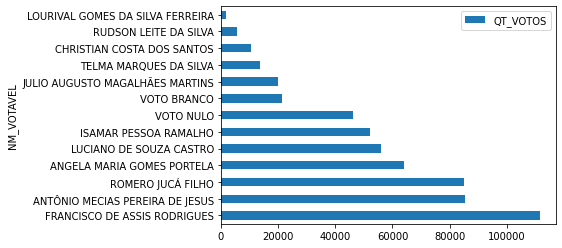

In [ ]:
senadores_sorted.plot(kind='barh')

## 2.2 Integrando os municipios

In [ ]:
senadores['NM_MUNICIPIO'].unique()

array(['CARACARAÍ', 'BOA VISTA', 'PACARAIMA', 'RORAINÓPOLIS', 'MUCAJAÍ',
       'SÃO LUIZ', 'CANTÁ', 'BONFIM', 'AMAJARI', 'IRACEMA',
       'SÃO JOÃO DA BALIZA', 'ALTO ALEGRE', 'CAROEBE', 'NORMANDIA',
       'UIRAMUTÃ'], dtype=object)

In [ ]:
df_senadores_por_municipios = senadores.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
por_municipio = df_senadores_por_municipios.apply(lambda x: x.sort_values(ascending=False))
por_municipio

QT_VOTOS
NM_MUNICIPIO       NM_VOTAVEL                                
BOA VISTA          FRANCISCO DE ASSIS RODRIGUES         80379
                   ROMERO JUCÁ FILHO                    54790
                   ANTÔNIO MECIAS PEREIRA DE JESUS      49176
                   ANGELA MARIA GOMES PORTELA           35584
                   LUCIANO DE SOUZA CASTRO              34477
...                                                       ...
UIRAMUTÃ           CHRISTIAN COSTA DOS SANTOS               8
SÃO JOÃO DA BALIZA LOURIVAL GOMES DA SILVA FERREIRA         8
NORMANDIA          LOURIVAL GOMES DA SILVA FERREIRA         5
CAROEBE            LOURIVAL GOMES DA SILVA FERREIRA         4
UIRAMUTÃ           LOURIVAL GOMES DA SILVA FERREIRA         1

[195 rows x 1 columns]

In [ ]:
df_juca_por_municipios = juca.groupby(['NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
juca_municipio = df_juca_por_municipios.apply(lambda x: x.sort_values(ascending=False))
juca_municipio

,QT_VOTOS
NM_MUNICIPIO,
BOA VISTA,54790
RORAINÓPOLIS,3803
CANTÁ,3707
CARACARAÍ,3402
MUCAJAÍ,2757
ALTO ALEGRE,2633
NORMANDIA,2059
BONFIM,1803
CAROEBE,1716


##2.3 Gráfico

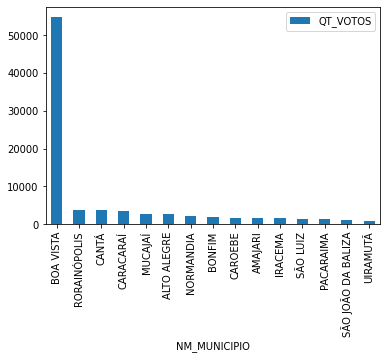

In [ ]:

juca_municipio.plot(kind='bar');



In [ ]:
type(juca_municipio)

pandas.core.frame.DataFrame

Text(0.5, 0, 'Municipios')

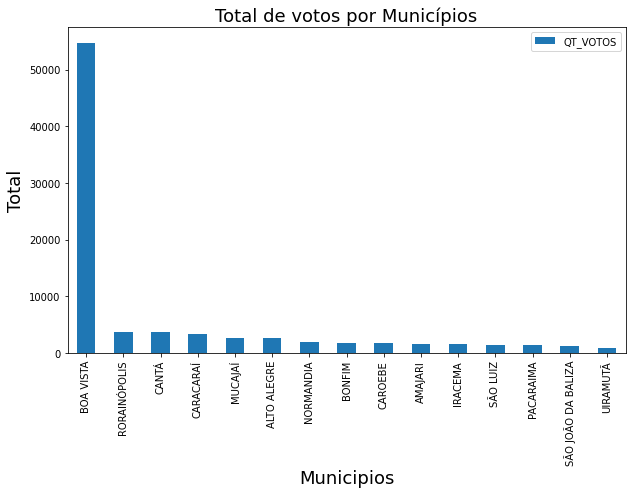

In [ ]:
# x =  juca_municipio['QT_VOTOS']
# y = juca_municipio['NM_MUNICIPIO']

# plt.bar(x, y, width=0.40, color=['royalblue','royalblue', 'red'])


juca_municipio.plot(kind='bar', figsize=(10,6));

plt.title('Total de votos por Municípios', fontsize=(18))
plt.ylabel('Total', fontsize=(18))
plt.xlabel('Municipios', fontsize=(18))



In [ ]:

# y = QT_VOTOS
# x = NM_MUNICIPIO

sns.catplot

# Plotando o gráfico

# plt.figure(figsize=(10,6))
# juca_municipio.plt(kind='bar')

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7fb3fe62d4d0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

#3. Estadual

In [ ]:
# Filtro para Dep Estadual

estadual =  df[df['DS_CARGO'] == 'DEPUTADO ESTADUAL']
estadual

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
0,BOA VISTA,5,436,DEPUTADO ESTADUAL,36200,JORGE LUIS VILTRE ESTEVEZ,1
2,BOA VISTA,5,424,DEPUTADO ESTADUAL,19900,VANDERLEI LIMA SANTANA,1
5,BOA VISTA,1,679,DEPUTADO ESTADUAL,55321,ADERVAL DA ROCHA FERREIRA FILHO,1
8,BOA VISTA,5,131,DEPUTADO ESTADUAL,22111,WENSTON PAULINO BERTO RAPOSO,1
9,BOA VISTA,1,155,DEPUTADO ESTADUAL,36800,ANDRE LUIS VILLÓRIA BRANDÃO,1
...,...,...,...,...,...,...,...
210607,BOA VISTA,1,639,DEPUTADO ESTADUAL,19111,WELBER DO CARMO FREITAS FILHO,1
210608,BOA VISTA,1,83,DEPUTADO ESTADUAL,10107,ALAN SOUSA ANDRADE,3
210609,RORAINÓPOLIS,8,11,DEPUTADO ESTADUAL,11333,JOSÉ REINALDO PEREIRA DA SILVA,1
210611,BOA VISTA,5,5,DEPUTADO ESTADUAL,15123,JOILMA TEODORA DE ARAÚJO SILVA,2


In [ ]:
estadual_mais_votados_2018 = estadual.groupby(['NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
estadual_mais_votados_2018

,QT_VOTOS
NM_VOTAVEL,
ABÍLIO OTÍLIO BEZERRA FILHO,151
ADAILTON ALVES FERNANDES,85
ADAILTON MENDES GALVÃO,946
ADELCIMAR AZEVEDO LIMA,55
ADERLEY CARNEIRO GUEDES,376
...,...
WUILIAN MENEZES SOUZA,103
WÉLITON DE ALENCAR AMORIM,340
YONNY PEDROSO DA SILVA,5872


In [ ]:
estadual_sorted = estadual_mais_votados_2018.sort_values('QT_VOTOS', ascending=False)
estadual_sorted.head(10)

,QT_VOTOS
NM_VOTAVEL,
JALSER RENIER PADILHA,8401
JANE JOSÉ DA SILVA,6132
YONNY PEDROSO DA SILVA,5872
VOTO NULO,5712
FRANCISCO JOSÉ BRITO BEZERRA,5307
MARCELO MOTA DE MACÊDO,5165
JORGE EVERTON BARRETO GUIMARÃES,5033
JOILMA TEODORA DE ARAÚJO SILVA,5014
LENIR RODRIGUES SANTOS,4947


## 3.1 Integrando os municipios

In [ ]:
estadual['NM_MUNICIPIO'].unique()

array(['BOA VISTA', 'CANTÁ', 'CARACARAÍ', 'MUCAJAÍ', 'ALTO ALEGRE',
       'SÃO JOÃO DA BALIZA', 'PACARAIMA', 'RORAINÓPOLIS', 'BONFIM',
       'NORMANDIA', 'UIRAMUTÃ', 'IRACEMA', 'AMAJARI', 'CAROEBE',
       'SÃO LUIZ'], dtype=object)

In [ ]:
df_estadual_por_municipios = estadual.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
estadual_por_municipio = df_estadual_por_municipios.apply(lambda x: x.sort_values(ascending=False))
estadual_por_municipio

QT_VOTOS
NM_MUNICIPIO NM_VOTAVEL                            
BOA VISTA    VOTO NULO                         4056
             JALSER RENIER PADILHA             3728
             YONNY PEDROSO DA SILVA            3079
             VOTO BRANCO                       2983
             FRANCISCO JOSÉ BRITO BEZERRA      2768
...                                             ...
CAROEBE      PAULO OLIVEIRA DOS SANTOS            1
             OZELIO IZIDORIO MESSIAS              1
             MOISES SANCHES DE LIMA               1
             MILTON JOSÉ PIOVESAN                 1
IRACEMA      LINDOMAR ALVES ALENCAR               1

[3899 rows x 1 columns]

##3.2 Filtrando o canditado do estudo

In [ ]:
lenir = estadual[estadual['NM_VOTAVEL'] == 'LENIR RODRIGUES SANTOS']
lenir 

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
677,BOA VISTA,1,577,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,4
1111,BOA VISTA,1,670,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,2
1429,BOA VISTA,1,32,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,4
1814,BOA VISTA,5,284,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,3
2254,BOA VISTA,1,317,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,1
...,...,...,...,...,...,...,...
209661,BOA VISTA,1,39,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,2
209966,BOA VISTA,1,620,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,3
210107,PACARAIMA,7,1,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,11
210208,SÃO JOÃO DA BALIZA,4,7,DEPUTADO ESTADUAL,23456,LENIR RODRIGUES SANTOS,4


In [ ]:
df_lenir_por_municipios = lenir.groupby(['NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
lenir_municipio = df_lenir_por_municipios.apply(lambda x: x.sort_values(ascending=False))
lenir_municipio

,QT_VOTOS
NM_MUNICIPIO,
BOA VISTA,2054
UIRAMUTÃ,791
PACARAIMA,360
BONFIM,316
NORMANDIA,298
CANTÁ,249
ALTO ALEGRE,189
CARACARAÍ,173
MUCAJAÍ,154


In [ ]:
# Comparar os candidatos com mais votos em iracema , são luiz e caroebe.



##3.3 Gráfico

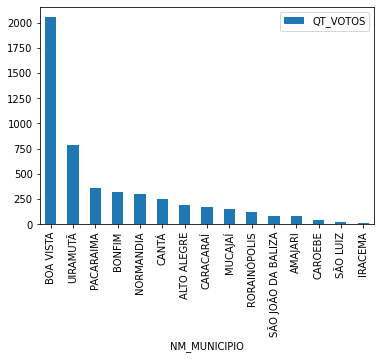

In [ ]:
lenir_municipio.plot(kind='bar')

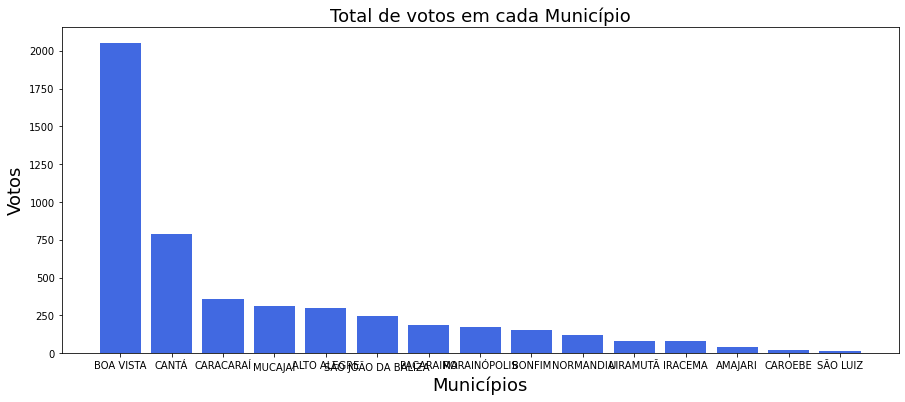

In [ ]:
# Plotando o gráfico

plt.figure(figsize=(15,6))
plt.bar(municipios,votos, width=0.8, color=['royalblue'])

plt.ylim()
plt.title('Total de votos em cada Município', fontsize=(18))
plt.ylabel('Votos', fontsize=(18))
plt.xlabel('Municípios', fontsize=(18))
plt.show()

In [ ]:
# Funcção criada necessária para plotar o gráfico a 
def autolabel (valores):
    for i in valores:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                xy = (i.get_x()+i.get_width()/2,h),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center')

In [ ]:
# Criando as vaqriaveis x e Y

municipios = ['BOA VISTA', 'CANTÁ', 'CARACARAÍ', 'MUCAJAÍ', 'ALTO ALEGRE',
       'SÃO JOÃO DA BALIZA', 'PACARAIMA', 'RORAINÓPOLIS', 'BONFIM',
       'NORMANDIA', 'UIRAMUTÃ', 'IRACEMA', 'AMAJARI', 'CAROEBE',
       'SÃO LUIZ']

votos_2014 = [1879, 298, 172, 149, 147, 145, 111, 98,	88,	80, 43,	41,	32,	31,	23]
votos_2018 = [2054, 791, 360, 316, 298, 249, 189, 173, 154, 123, 81, 80, 41, 24, 14]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


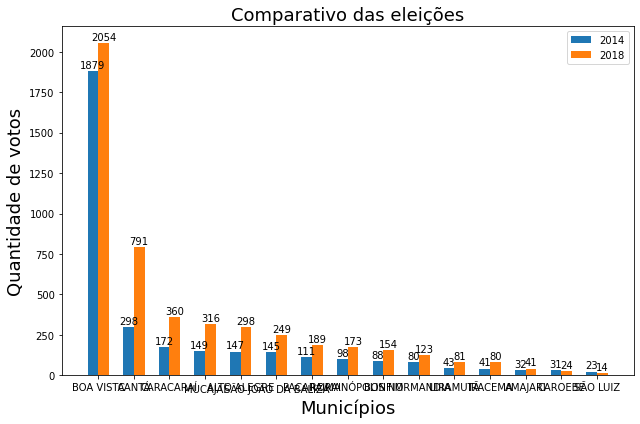

In [ ]:
# passando os valores para lista

municipios = ['BOA VISTA', 'CANTÁ', 'CARACARAÍ', 'MUCAJAÍ', 'ALTO ALEGRE',
       'SÃO JOÃO DA BALIZA', 'PACARAIMA', 'RORAINÓPOLIS', 'BONFIM',
       'NORMANDIA', 'UIRAMUTÃ', 'IRACEMA', 'AMAJARI', 'CAROEBE',
       'SÃO LUIZ']
votos_2014 = [1879, 298, 172, 149, 147, 145, 111, 98,	88,	80, 43,	41,	32,	31,	23]
votos_2018 = [2054, 791, 360, 316, 298, 249, 189, 173, 154, 123, 81, 80, 41, 24, 14]

x = np.arange(len(municipios))  
largura = 0.30 

fig, ax = plt.subplots(figsize=(9,6))
v_2014 = ax.bar(x - largura/2, votos_2014, largura, label='2014')
v_2018 = ax.bar(x + largura/2, votos_2018, largura, label='2018')

# Nomeando a tabela
ax.set_title('Comparativo das eleições',fontsize=(18))
ax.set_ylabel('Quantidade de votos',fontsize=(18))
ax.set_xlabel('Municípios',fontsize=(18))

ax.legend()
ax.set_ylim()
ax.set_xticks(x,municipios)

ax.set_xticks(x)
ax.set_xticklabels(municipios)


autolabel(v_2014)
autolabel(v_2018)

fig.tight_layout()

plt.show()

In [ ]:
msno.heatmap(lenir_municipio)

#4. Deputado Federal

In [ ]:
dep_Federal = df[df['DS_CARGO'] == 'DEPUTADO FEDERAL']
dep_Federal

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
1,BOA VISTA,1,206,DEPUTADO FEDERAL,1400,KARDEC JAKSON SANTOS DA SILVA,2
6,BOA VISTA,5,338,DEPUTADO FEDERAL,22,Partido da República,2
7,CARACARAÍ,2,7,DEPUTADO FEDERAL,1510,RENATO ANDRADE QUEIROZ,8
10,BOA VISTA,1,662,DEPUTADO FEDERAL,2121,PAULO THADEU FRANCO DAS NEVES,1
12,BOA VISTA,1,176,DEPUTADO FEDERAL,7007,MATEUS RODRIGUES DE OLIVEIRA,1
...,...,...,...,...,...,...,...
210610,BOA VISTA,1,616,DEPUTADO FEDERAL,2121,PAULO THADEU FRANCO DAS NEVES,2
210613,BOA VISTA,5,149,DEPUTADO FEDERAL,10,Partido Republicano Brasileiro,1
210615,BOA VISTA,1,645,DEPUTADO FEDERAL,7722,LEVI RODRIGUES SOARES,1
210616,BOA VISTA,5,343,DEPUTADO FEDERAL,4343,RAIMUNDO NONATO MOTA FILHO,1


In [ ]:
dep_Federal.columns

Index(['NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO', 'NR_VOTAVEL',
       'NM_VOTAVEL', 'QT_VOTOS'],
      dtype='object')

In [ ]:
dep_Federal = df[df['DS_CARGO'] == 'DEPUTADO FEDERAL'] and 
dep_Federal

In [ ]:
dep_fedeal_mais_votados_2018 = dep_Federal.groupby(['NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
dep_fedeal_mais_votados_2018

,QT_VOTOS
NM_VOTAVEL,
ADILSON SOARES DE ALMEIDA,1036
ADRIANA KARLA MELO MARTINS,351
AIRTON ANTONIO SOLIGO,10490
ALCIONISA DEISE BELOUS REIS,46
ALEX FABIAN FERREIRA DA SILVA,992
...,...
WALDNEY CASTRO DO ESPIRITO SANTO,1518
WESLEY CARLOS THOMÉ,4178
WESLY MONTELES DE SOUSA,54


In [ ]:
dep_fedeal_mais_votados_por_municio = dep_Federal.groupby(['NM_VOTAVEL', 'NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
dep_fedeal_mais_votados_por_municio

QT_VOTOS
NM_VOTAVEL                NM_MUNICIPIO                
ADILSON SOARES DE ALMEIDA ALTO ALEGRE                6
                          AMAJARI                    1
                          BOA VISTA                151
                          BONFIM                     2
                          CANTÁ                      5
...                                                ...
WIRLANDE SANTOS DA LUZ    PACARAIMA                 23
                          RORAINÓPOLIS               7
                          SÃO JOÃO DA BALIZA         3
                          SÃO LUIZ                   5
                          UIRAMUTÃ                   2

[2020 rows x 1 columns]

In [ ]:
adilson = dep_fedeal_mais_votados_por_municio[['NM_VOTAVEL'] =='ADILSON SOARES DE ALMEIDA']

KeyError: ignored

# 4.1 Mais votados

In [ ]:
dep_fedeal_sorted = dep_fedeal_mais_votados_2018.sort_values('QT_VOTOS', ascending=False)
dep_fedeal_sorted.head(15)

,QT_VOTOS
NM_VOTAVEL,
HAROLDO ALVES CAMPOS,14751
JOHNATHAN PEREIRA DE JESUS,13429
HIRAN MANUEL GONÇALVES DA SILVA,13299
ANTONIO CARLOS NICOLETTI,12969
SHÉRIDAN ESTÉRFANY OLIVEIRA DE ANCHIETA,12129
EDIO VIEIRA LOPES,11952
JOSE OTACI BARROSO DO NASCIMENTO,11879
AIRTON ANTONIO SOLIGO,10490
JOSE LURENE NUNES AVELINO JUNIOR,8907


# 4.2 Votos por municipios

In [ ]:
dep_Federal['NM_MUNICIPIO'].unique()

array(['BOA VISTA', 'CARACARAÍ', 'RORAINÓPOLIS', 'AMAJARI', 'NORMANDIA',
       'ALTO ALEGRE', 'CANTÁ', 'IRACEMA', 'PACARAIMA', 'BONFIM',
       'CAROEBE', 'UIRAMUTÃ', 'SÃO LUIZ', 'MUCAJAÍ', 'SÃO JOÃO DA BALIZA'],
      dtype=object)

In [ ]:
df_Federal_por_municipios = dep_Federal.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL']).agg({'QT_VOTOS': 'sum'})
dep_Federal_por_municipios = df_Federal_por_municipios.apply(lambda x: x.sort_values(ascending=False))
type(dep_Federal_por_municipios)

pandas.core.frame.DataFrame

In [ ]:
bv = dep_Federal_por_municipios[dep_Federal_por_municipios['NM_MUNICIPIO'] == 'BOA VISTA']

KeyError: ignored

##4.3 esclher o Deputado

In [ ]:
dep_Federal_por_municipios_sorted = dep_Federal_por_municipios.sort_values('NM_MUNICIPIO', ascending=False)
dep_fedeal_sorted


,QT_VOTOS
NM_VOTAVEL,
HAROLDO ALVES CAMPOS,14751
JOHNATHAN PEREIRA DE JESUS,13429
HIRAN MANUEL GONÇALVES DA SILVA,13299
ANTONIO CARLOS NICOLETTI,12969
SHÉRIDAN ESTÉRFANY OLIVEIRA DE ANCHIETA,12129
...,...
MARIA HILDA LIMA DE SOUSA,17
NONAYRA DOS SANTOS LUCENA,16
HELENA CARRIL UMBELINO,14


In [ ]:
nicoletti = dep_Federal[dep_Federal['NM_VOTAVEL'] == 'ANTONIO CARLOS NICOLETTI']
nicoletti

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
387,CAROEBE,4,12,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,2
465,BOA VISTA,1,532,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,20
579,SÃO LUIZ,4,83,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,5
807,BOA VISTA,1,169,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,13
814,SÃO LUIZ,4,27,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,1
...,...,...,...,...,...,...,...
209555,BOA VISTA,5,15,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,23
209575,CARACARAÍ,2,131,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,5
209693,BOA VISTA,5,123,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,14
210054,SÃO LUIZ,4,87,DEPUTADO FEDERAL,1717,ANTONIO CARLOS NICOLETTI,3


In [ ]:
df_nicoletti_por_municipios = nicoletti.groupby(['NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
nicoletti_municipio = df_nicoletti_por_municipios.apply(lambda x: x.sort_values(ascending=False))
nicoletti_municipio

,QT_VOTOS
NM_MUNICIPIO,
BOA VISTA,10862
CARACARAÍ,594
RORAINÓPOLIS,411
MUCAJAÍ,241
CANTÁ,206
ALTO ALEGRE,127
IRACEMA,108
PACARAIMA,104
BONFIM,81
